In [24]:
import os 
print("Current working directory:", os.getcwd())
# List all files in the current directory to verify the file exists
print("Files in current directory:", os.listdir())


Current working directory: /Users/lilithuphoff/Monochromator
Files in current directory: ['analysis.csv', '50%.txt', '.DS_Store', 'Halogenrot.txt', 'Messdaten_neuneu', '.ipynb_checkpoints', 'Final_table_GYPT.csv', 'rot.txt', 'Curvefit.ipynb']


Amplitude = 1835.924, Mittelwert = 616.533, Sigma = 87.770958


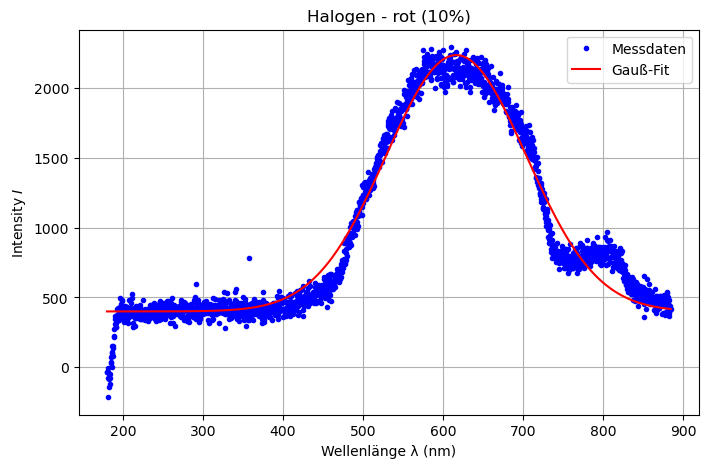

In [35]:
import math
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


# --- Gauß-Funktion definieren ---
def Gauß_Funktion(x, a, b, c, off):
    y = a * np.exp((-(x - b) ** 2) / (2 * c ** 2)) + off
    return y

# --- Messdaten einlesen ---
Messdaten = np.loadtxt("Halogenrotrot.txt")

# Bereich für die Auswertung festlegen
xmax = 500
xmin = 380

x = Messdaten[:, 0]
mask = (x >= xmin) & (x <= xmax)
#Messdaten = Messdaten[mask]

x = Messdaten[:, 0]
y = Messdaten[:, 1]

# --- Fit der Gauß-Funktion ---
initial_guess = [max(y), np.mean(x), np.std(x), 400]
params, covariance = curve_fit(Gauß_Funktion, x, y, p0=initial_guess)
A_fit, mu_fit, sigma_fit, off = params

print(f"Amplitude = {A_fit:.3f}, Mittelwert = {mu_fit:.3f}, Sigma = {sigma_fit:.6f}")

# --- Plot der Daten und der Fitkurve ---
plt.figure(figsize=(8, 5))
plt.plot(x, y, "b.", label="Messdaten")
plt.plot(x, Gauß_Funktion(x, *params), "r-", label="Gauß-Fit")
plt.xlabel("Wellenlänge λ (nm)")
plt.ylabel("Intensity $I$")
plt.legend()
plt.title("Halogen - rot (10%)")
plt.grid(True)
plt.show()

In [31]:
full_width_half_max = 2 * np.sqrt(2 * np.log(2)) * sigma_fit
print(f"FWHM = {full_width_half_max}")

FWHM = 446.54906135585253


In [4]:
import os
os.listdir()


['analysis.csv',
 '.DS_Store',
 'Messdaten_neuneu',
 '.ipynb_checkpoints',
 'Final_table_GYPT.csv',
 'Curvefit.ipynb']

In [5]:
from pathlib import Path
import numpy as np
import pandas as pd 
from scipy.optimize import curve_fit
path = Path('.')
folders = [p.name for p in path.iterdir() if p.is_dir() and not p == Path('./.ipynb_checkpoints')]

print(folders)

['Messdaten_neuneu']


In [6]:
def Gauß_Funktion(x, a, b, c, off):
    y = a * np.exp((-(x - b) ** 2) / (2 * c ** 2)) + off
    return y

def comma_to_periods(s):
    
    return float(s.replace(',', '.'))


table = []


for folder in folders:
    print(folder)
    for file in (path/folder).iterdir():
        print('\t', file)
        
        if not str(file).endswith('.txt'):
            continue
        #if str(file).startswith('.'):
        #    continue

        with file.open() as file_stream:
            for line, line_content in enumerate(file_stream): 
                if ">>>>>Begin Spectral Data<<<<<" in line_content:
                    break 
                    
            

        Messdaten = np.loadtxt(file, converters= comma_to_periods, skiprows=line+1)
        xmax = 500
        xmin = 380

        x = Messdaten[:, 0]
        mask = (x >= xmin) & (x <= xmax)
        Messdaten = Messdaten[mask]
        
        x = Messdaten[:, 0]
        y = Messdaten[:, 1]
        initial_guess = [max(y), np.mean(x), np.std(x), 400]
        params, covariance = curve_fit(Gauß_Funktion, x, y, p0=initial_guess)
        errors = np.sqrt(np.diag(covariance))
        A_fit, mu_fit, sigma_fit, off = params
        A_fit_err, mu_fit_err, sigma_fit_err, off_err = errors
        
        print(f"\t\tAmplitude = {A_fit:.3f}, Mittelwert = {mu_fit:.3f}, Sigma = {sigma_fit:.6f}")
        print(f"\t\t{covariance[0]}\n\t\t{covariance[1]}\n\t\t{covariance [2]}\n\t\t{covariance[3]}")
        full_width_half_max = 2 * np.sqrt(2 * np.log(2)) * sigma_fit
        full_width_half_max_err = np.absolute(2 * np.sqrt(2 * np.log(2))) * sigma_fit_err
        print(f"\t\tFWHM = {full_width_half_max}")

        table.append([
            str(file),
            A_fit, mu_fit, sigma_fit, off, full_width_half_max,
            A_fit_err, mu_fit_err, sigma_fit_err, off_err, full_width_half_max_err
            
   
        ])



Messdaten_neuneu
	 Messdaten_neuneu/Halogen (50:20) rot.txt
		Amplitude = -1253290.849, Mittelwert = 374.424, Sigma = 6288.516509
		[ 2.99931723e+17  1.52085155e+09 -7.52867860e+14 -2.99931721e+17]
		[ 1.52085155e+09  1.16043789e+02 -3.82244163e+06 -1.52085145e+09]
		[-7.52867860e+14 -3.82244163e+06  1.88979705e+12  7.52867854e+14]
		[-2.99931721e+17 -1.52085145e+09  7.52867854e+14  2.99931719e+17]
		FWHM = 14808.324728644158
	 Messdaten_neuneu/Handy (50:50) gelb .txt
		Amplitude = -424.131, Mittelwert = 403.644, Sigma = 42.506822
		[ 277.46838967    8.06276503  -34.73835785 -285.03748956]
		[ 8.06276503  1.93370778 -2.36233486 -8.86733669]
		[-34.73835785  -2.36233486   6.64007477  40.90874143]
		[-285.03748956   -8.86733669   40.90874143  320.08809094]
		FWHM = 100.09591590225514
	 Messdaten_neuneu/Handy (50:50)  gelb.txt
		Amplitude = -345.246, Mittelwert = 403.178, Sigma = 45.653211
		[ 441.92864826   16.91751961  -71.62622417 -459.02284485]
		[ 16.91751961   3.88768755  -5.2593758

In [7]:
#np.savetxt(
    #"analisys.csv",
   # photons,
   # delimiter=";", fmt="%s %.6f %.6f %.6f %.6f %.6f %.6f %.6f %.6f %.6f %.6f ",
    #header="Filename;Amplitude;Mu;Sigma;Offset;FWHM;Amplitude_error;Mu_error;Offset_error;FWHM_error",
    #comments=""
#)

In [8]:
data = [[
    A_fit,
    mu_fit,
    sigma_fit,
    off,
    full_width_half_max,
    A_fit_err,
    mu_fit_err,
    sigma_fit_err,
    off_err,
    full_width_half_max_err
]]

np.savetxt(
    "analysis.csv",
    data,
    delimiter=";",
    fmt="%.6f;%.6f;%.6f;%.6f;%.6f;%.6f;%.6f;%.6f;%.6f;%.6f",
    header="Amplitude;Mu;Sigma;Offset;FWHM;Amplitude_error;Mu_error;Sigma_error;Offset_error;FWHM_error",
    comments=""
)

In [9]:
table_df = pd.DataFrame(table)
table_df.columns = ["Filename","Amplitude","Mu","Sigma","Offset","FWHM","Amplitude_error","Mu_error", "Sigma_error", "Offset_error","FWHM_error"]
table_df.to_csv("Final_table_GYPT.csv")